<a href="https://colab.research.google.com/github/Lud-lud/segmentacao_estudantes_clustering_analysis/blob/main/analise_clustering_notas_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de inscritos no Sisu por meio de método de clusterização k-means
Neste projeto, serão utilizados dados do Sisu de 2022 ([Fonte: Base dos Dados](https://basedosdados.org/dataset/8326e3d7-9cd2-4144-863f-c380fefef82c?table=4c60ec40-fadf-433d-98a5-f73e90106f7a)). Foram selecionados todos os inscritos oriundos da cidade de Morrinhos (minha cidade Natal!).


In [114]:
import pandas as pd
import numpy as np

df = pd.read_csv('dados_sisu_2022_morrinhos.csv')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cpf                          782 non-null    object 
 1   inscricao_enem               782 non-null    object 
 2   candidato                    782 non-null    object 
 3   data_nascimento              782 non-null    object 
 4   sigla_uf_candidato           782 non-null    object 
 5   id_municipio_candidato       782 non-null    int64  
 6   id_municipio_candidato_nome  782 non-null    object 
 7   nota_l                       782 non-null    float64
 8   nota_ch                      782 non-null    float64
 9   nota_cn                      782 non-null    float64
 10  nota_m                       782 non-null    float64
 11  nota_r                       782 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 73.4+ KB


Vamos prosseguir com as análises selecionando apenas os dados quantitativos para utilizar no algoritmo de clusterização.

In [116]:
df.rename(columns={'nota_ch': 'Ciências Humanas',
                       'nota_m': 'Matemática',
                       'nota_cn': 'Ciências da Natureza',
                       'nota_l': 'Linguagens',
                       'nota_r': 'Redação'},
              inplace=True)
df_num = df[['Ciências Humanas', 'Matemática', 'Ciências da Natureza', 'Linguagens', 'Redação']]



In [117]:
df_num.describe()

,Ciências Humanas,Matemática,Ciências da Natureza,Linguagens,Redação
count,782.000000,782.000000,782.000000,782.000000,782.000000
mean,552.985166,574.070077,520.622762,529.294373,755.473146
std,90.593001,114.229734,92.627702,77.834090,147.576126
min,352.200000,355.800000,344.400000,325.100000,340.000000
25%,487.900000,479.300000,444.500000,478.075000,645.000000
50%,558.900000,568.400000,512.100000,534.600000,760.000000
75%,621.500000,656.525000,585.300000,583.300000,880.000000
max,745.500000,844.800000,735.600000,718.000000,980.000000


In [118]:
import plotly.express as px

fig = px.scatter_3d(df_num,
                   x='Linguagens',
                   y='Matemática',
                   z='Redação')
fig.show()

Pela análise do gráfico 3D* com apenas 3 das 5 variáveis, observa-se que há um tendência linear positiva (quanto maior a nota de Redação, maior a nota de Linguagens e Matemática).

*Gráfico 3D interativo não visível no arquivo .ipynb no GitHub (para visualizar, abrir o arquivo em ambiente Colab). Veja a versão estática abaixo.

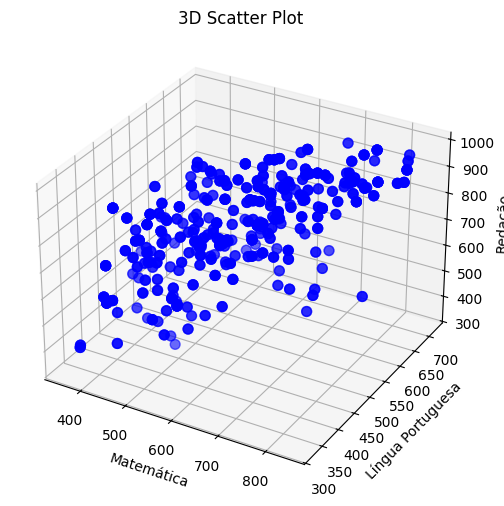

In [119]:
import matplotlib.pyplot as plt

# Dados do gráfico
x = df_num['Matemática']
y = df_num['Linguagens']
z = df_num['Redação']

# Criar o gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d')

# Scatter plot com cores personalizadas
ax.scatter(x, y, z, s=50, c='blue', marker='o')

# Personalizar o gráfico
ax.set_xlabel('Matemática')
ax.set_ylabel('Língua Portuguesa')
ax.set_zlabel('Redação')
plt.title("3D Scatter Plot")

# Salvar e exibir
plt.savefig('3d_scatterplot.png')
plt.show()

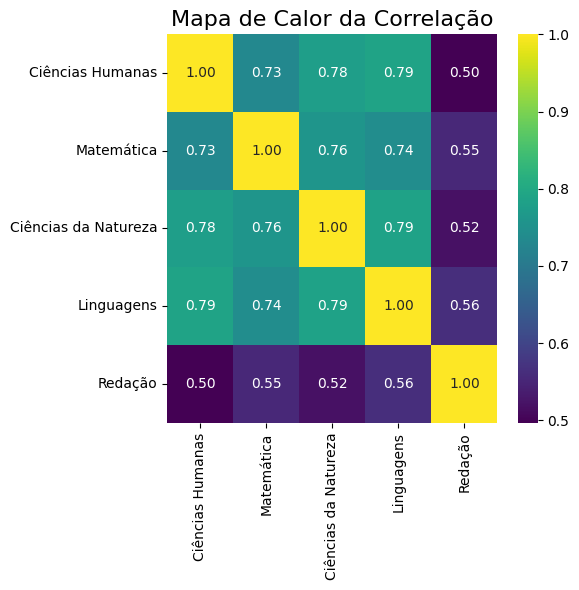

In [120]:
import seaborn as sns
import numpy as np

# Calcula a matriz de correlação
corr = df_num.corr()

# Configura o tamanho do gráfico
plt.figure(figsize=(6, 6))

# Cria o mapa de calor usando seaborn
sns.heatmap(
    corr,
    annot=True,         # Exibe os valores no mapa de calor
    fmt=".2f",          # Formato dos valores
    cmap="viridis",     # Paleta de cores
    cbar=True           # Adiciona a barra de cores
)

# Adiciona título e ajusta o layout
plt.title("Mapa de Calor da Correlação", fontsize=16)
plt.tight_layout()

# Salva o gráfico como uma imagem estática (opcional)
plt.savefig("heatmap_static.png", dpi=300)

# Mostra o gráfico
plt.show()


De fato, Redação tem uma correlação positiva moderada com Matemática e Redação, assim como com as demais áreas de avaliação. No entanto, observa-se correlações ainda mais fortes entre Linguagens, Matemática, Ciências Humanas e Ciências da Natureza.

In [121]:
!pip install pingouin

In [122]:
# Estatísticas descritivas das variáveis
import pingouin as pg

# Gerando a matriz de correlações de Pearson
matriz_corr = pg.rcorr(df_num, method = 'pearson', upper = 'pval',
                       decimals = 4,
                       pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

print(matriz_corr)

                     Ciências Humanas Matemática Ciências da Natureza  \
Ciências Humanas                    -        ***                  ***   
Matemática                     0.7315          -                  ***   
Ciências da Natureza           0.7773     0.7599                    -   
Linguagens                     0.7879     0.7408               0.7866   
Redação                        0.4971     0.5534               0.5193   

                     Linguagens Redação  
Ciências Humanas            ***     ***  
Matemática                  ***     ***  
Ciências da Natureza        ***     ***  
Linguagens                    -     ***  
Redação                  0.5633       -  


Todas as correlações observadas são estatisticamente significantes a 0,05% de nível de significância. A avaliação das correlações é um procedimento indicado para avaliar inicialmente a possibilidade de realização de uma PCA para diminuição da dimensionalidade dos dados. Neste exemplo, como temos apenas 5 variáveis e poucas observações, não realizaremos a PCA, pois não querer perder informações. Caso houvesse um grande número de variáveis e  observações, a realização da PCA é recomendável para reduzir o custo computacional.

Outra observação importante é avaliar se a escala das variáveis é diferente pois, caso seja, é indispensável a realização da padronização, que pode ser feita com o procedimento z-scores, para que a escala não distorça as medidas de distância. Neste projeto, como todas as variáveis a serem utilizadas são notas que variam de 300 a 1000, não é necessário fazer a padronização dos dados.

## Definição do número de clusters

### Método de Elbow

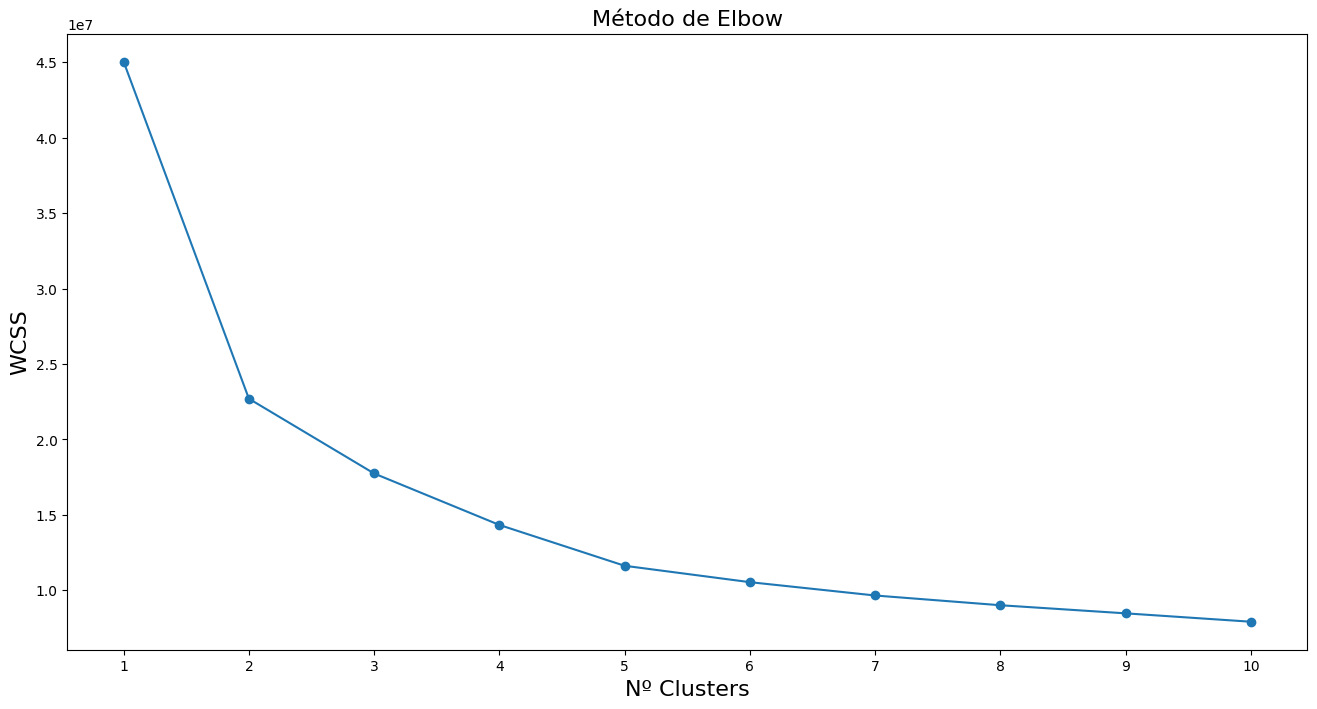

In [123]:
from sklearn.cluster import KMeans

elbow = []
K = range(1,11) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(df_num)
    elbow.append(kmeanElbow.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) # ajustar range
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

A análise da figura acima, chamado método de Elbow (ou método do cotovelo) mostra que o número ideal de clusters é 2, que é o ponto onde há um ângulo maior. No entanto, também é possível enxergar um leve "cotovelo" quando há 5 clusters.

### Método da Silhueta
Podemos utilizar também o método da Silhueta para avaliar a qualidade da formação de clusters com números distintos de clusters. Quanto maior o valor, menores são as distâncias dentro dos clusters e maiores são as distâncias entre clusters.

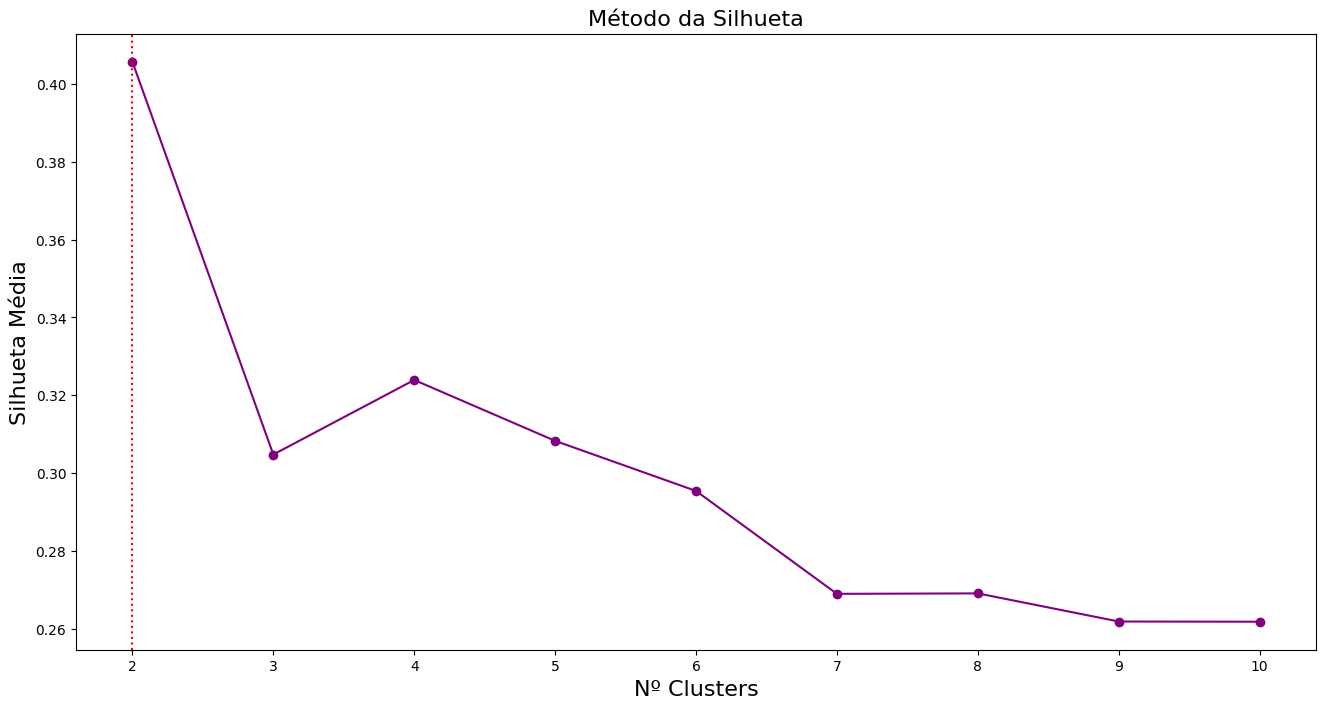

In [124]:
from sklearn.metrics import silhouette_score

silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I:
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(df_num)
    silhueta.append(silhouette_score(df_num, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red')
plt.show()


A silhueta mostra que com 2 clusters, a qualidade é melhor. Entretanto, quanto menor o número de clusters, mais heterogêneos serão as observações dentro dos clusters. Como o objetivo é maximizar a homogeneidade dentro dos clusters, então é interessante adotar um número maior. A figura sugere que 4 clusters também teria boa qualidade.

### Método hierárquico aglomerativo
Outra forma de definir o número de clusters é realizando uma clusterização por meio do esquema de aglomeração hierárquico.

Isto é bastante útil para quando não se tem uma ideia sobre quantos clusters pode-se obter a partir dos dados.

Neste projeto, vamos testar primeiramente o método de encadeamento médio (Average Linkage ou Between Groups), que se comporta de acordo com a proximidade das observações.

Neste caso, como há algumas observações próximas entre si (conforme visualizado no gráfico 3D), ele irá se comportar como o dendograma feito com o método de encadeamento Complete Linkage ao invés do Single Linkage (o qual é ideal para quando as observações estão mais distantes entre si).

Como medida de distância, vamos utilizar a euclidiana, a mais utilizada para este tipo de análise.

A linha vermelha será traçada onde começam a surgir grandes saltos de distância (a definição é puramente visual).

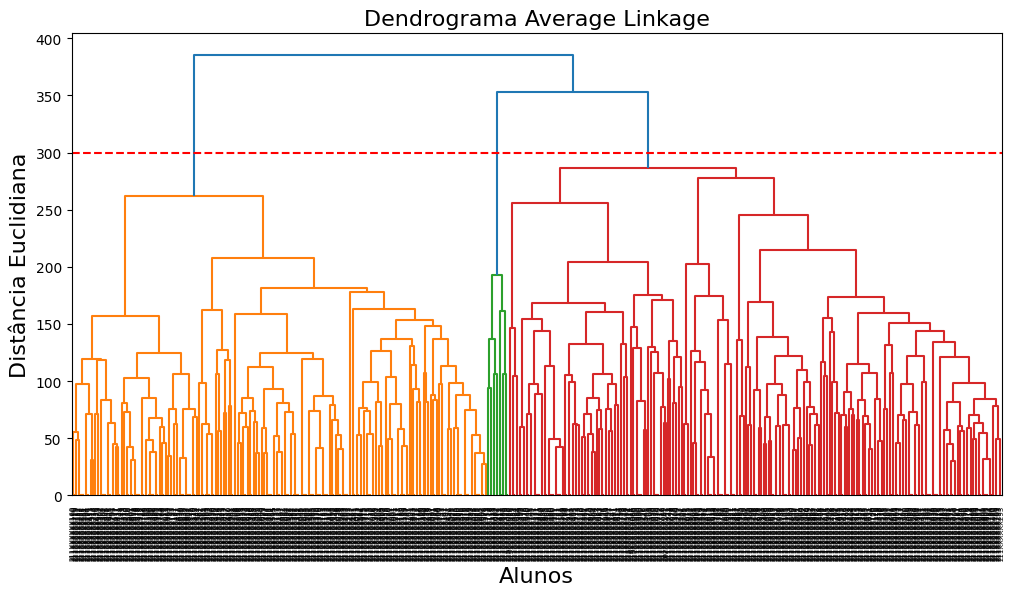

In [125]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,6))
dend_sing = sch.linkage(df_num, method = 'average', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 300, labels = list(df.inscricao_enem))
plt.title('Dendrograma Average Linkage', fontsize=16)
plt.xlabel('Alunos', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 300, color = 'red', linestyle = '--')
plt.show()

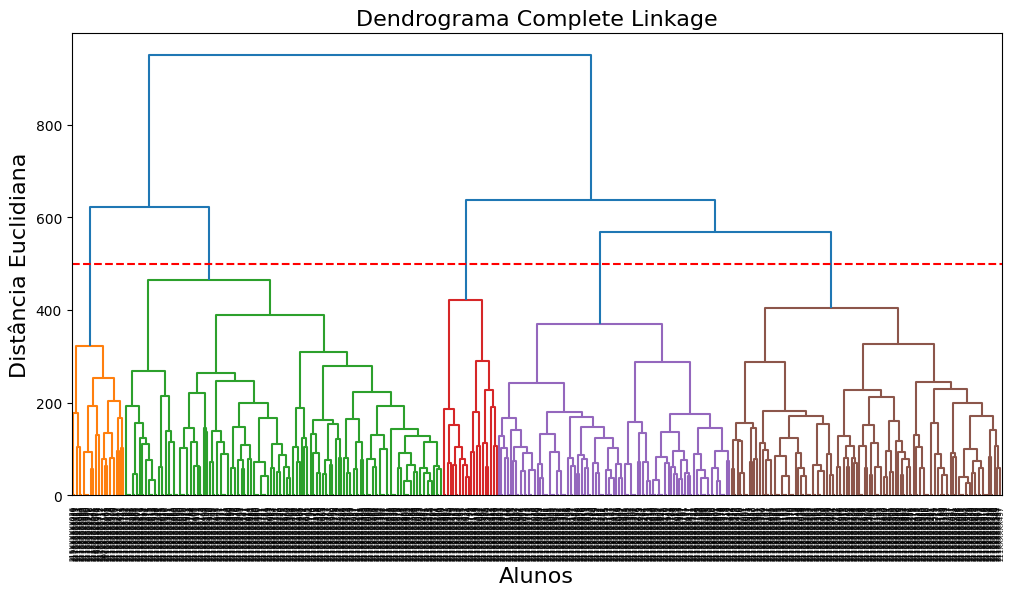

In [126]:
plt.figure(figsize=(12,6))
dend_sing = sch.linkage(df_num, method = 'complete', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 500, labels = list(df.inscricao_enem))
plt.title('Dendrograma Complete Linkage', fontsize=16)
plt.xlabel('Alunos', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 500, color = 'red', linestyle = '--')
plt.show()

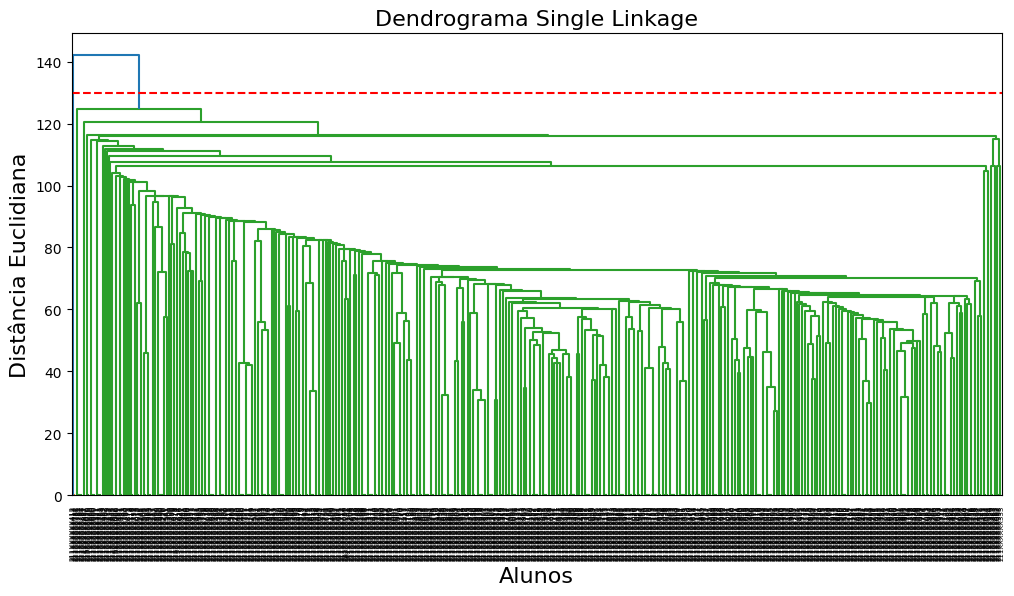

In [127]:
plt.figure(figsize=(12,6))
dend_sing = sch.linkage(df_num, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 130, labels = list(df.inscricao_enem))
plt.title('Dendrograma Single Linkage', fontsize=16)
plt.xlabel('Alunos', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 130, color = 'red', linestyle = '--')
plt.show()

Percebe-se que o melhor dendograma é o realizado pelo método de encadeamento Complete Linkage. Defini uma linha que separa as observações em 5 clusters, mas poderia ter passado mais abaixo, o que resultaria em 10 clusters com observações mais homogêneas entre si. Portanto, o critério de escolha sempre será arbitrário e deverá levar em consideração o trade-off entre número de cluster e heterogeneidade dentro dos clusters.

## Clusterização pelo método k-means

In [128]:
kmeans_final = KMeans(n_clusters = 5, init = 'random', random_state=100).fit(df_num)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans_final.labels_
df['cluster_kmeans'] = kmeans_clusters

In [129]:
df.head()

,cpf,inscricao_enem,candidato,data_nascimento,sigla_uf_candidato,id_municipio_candidato,id_municipio_candidato_nome,Linguagens,Ciências Humanas,Ciências da Natureza,Matemática,Redação,cluster_kmeans
0,XXX.834263-XX,211XXXXXX480,GIOVANA GOMES DE CARVALHO,2003-02-17,GO,5213806,Morrinhos,350.8,431.5,432.4,421.0,580.0,1
1,XXX.834263-XX,211XXXXXX480,GIOVANA GOMES DE CARVALHO,2003-02-17,GO,5213806,Morrinhos,350.8,431.5,432.4,421.0,580.0,1
2,XXX.906261-XX,211XXXXXX916,BRENDA LAURA DE SOUZA,2003-05-29,GO,5213806,Morrinhos,521.2,595.9,561.1,633.7,800.0,0
3,XXX.906261-XX,211XXXXXX916,BRENDA LAURA DE SOUZA,2003-05-29,GO,5213806,Morrinhos,521.2,595.9,561.1,633.7,800.0,0
4,XXX.085411-XX,211XXXXXX109,ANDRESSA DANDARA GONTIJO DE LIMA,2003-09-24,GO,5213806,Morrinhos,428.4,448.2,393.4,613.5,580.0,1


Vamos avaliar quais disciplinas contribuíram para a formação dos grupos por meio do teste estatístico F de análise de variância de um fator (ANOVA one-way), que nos diz se pelo menos 1 cluster é estatisticamente diferente dos demais considerando cada variável.



In [130]:
import pingouin as pg

p_valor = pd.DataFrame({'Disciplina': df_num.columns, 'p_valor': [None] * len(df_num.columns)})

for i, coluna in enumerate(df_num.columns):
    anova = pg.anova(dv=coluna,
                     between='cluster_kmeans',
                     data=df,
                     detailed=True)
    p_val = anova['p-unc'].iloc[0]  # Seleciona o primeiro valor de p-unc
    p_valor.loc[i, 'p_valor'] = p_val

print(p_valor)

             Disciplina p_valor
0      Ciências Humanas     0.0
1            Matemática     0.0
2  Ciências da Natureza     0.0
3            Linguagens     0.0
4               Redação     0.0


In [131]:
print(df['cluster_kmeans'])

0      1
1      1
2      0
3      0
4      1
      ..
777    2
778    0
779    2
780    0
781    3
Name: cluster_kmeans, Length: 782, dtype: int32


## Caracterização dos clusters

In [132]:
pal = {'0': '#ef476f', '1': '#ffd166', '2': '#06d6a0', '3': '#118ab2', '4': '#7b1e7a'}

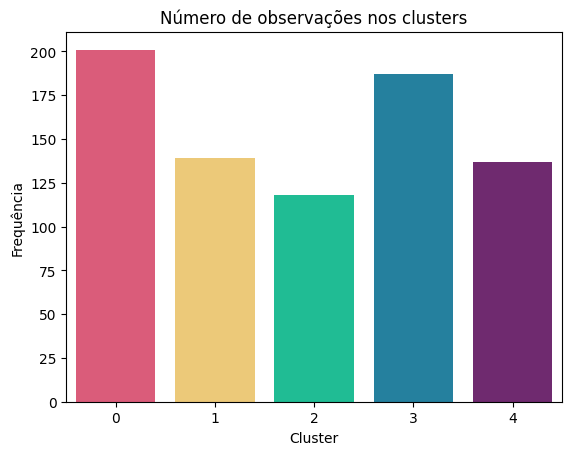

In [133]:
sns.countplot(x=df["cluster_kmeans"].sort_values().astype(str),
              palette=pal, dodge=False)
plt.title("Número de observações nos clusters")
plt.xlabel("Cluster")
plt.ylabel("Frequência")

# Salvar e exibir
plt.savefig('numero_clusters.png')
plt.show()

In [134]:
centroides = pd.DataFrame(kmeans_final.cluster_centers_)
centroides.columns = df_num.columns
centroides.index.name = 'cluster'
centroides

,Ciências Humanas,Matemática,Ciências da Natureza,Linguagens,Redação
cluster,,,,,
0,576.085075,604.235821,537.908955,554.028358,881.293532
1,460.151799,451.545324,424.900000,435.999281,540.863309
2,594.869492,599.509322,553.474576,562.687288,644.745763
3,485.385561,494.950802,453.793583,479.934225,743.957219
4,669.478102,740.209489,655.305109,626.275912,899.708029


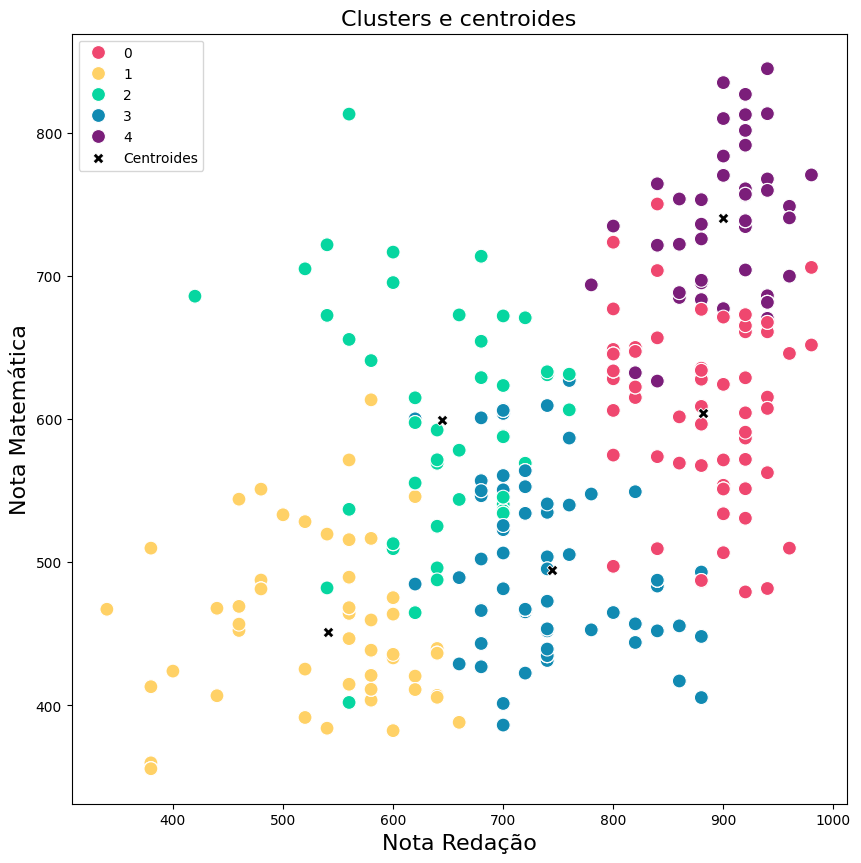

In [135]:
pal = {0: '#ef476f', 1: '#ffd166', 2: '#06d6a0', 3: '#118ab2', 4: '#7b1e7a'}

plt.figure(figsize=(10,10))
sns.scatterplot(x='Redação', y='Matemática', data=df, hue='cluster_kmeans', palette=pal, s=100)
sns.scatterplot(x='Redação', y='Matemática', data=centroides, s=60, c='black', label='Centroides', marker="X")
plt.title('Clusters e centroides', fontsize=16)
plt.xlabel('Nota Redação', fontsize=16)
plt.ylabel('Nota Matemática', fontsize=16)
plt.legend(loc='upper left')

# Salvar e exibir
plt.savefig('scatterplot_clusters.png')
plt.show()

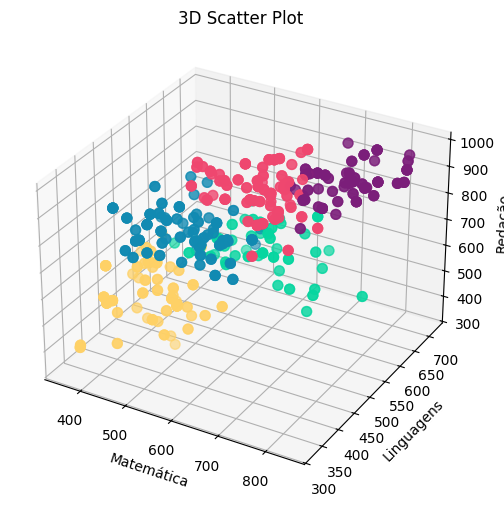

In [136]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Mapear as cores para cada ponto
cores = df["cluster_kmeans"].map(pal)

# Dados do gráfico
x = df['Matemática']
y = df['Linguagens']
z = df['Redação']

# Criar o gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d')

# Scatter plot com cores personalizadas
ax.scatter(x, y, z, s=50, c=cores, marker='o')

# Personalizar o gráfico
ax.set_xlabel('Matemática')
ax.set_ylabel('Linguagens')
ax.set_zlabel('Redação')
plt.title("3D Scatter Plot")

# Salvar e exibir
plt.savefig('3d_scatterplot_clusters.png')
plt.show()


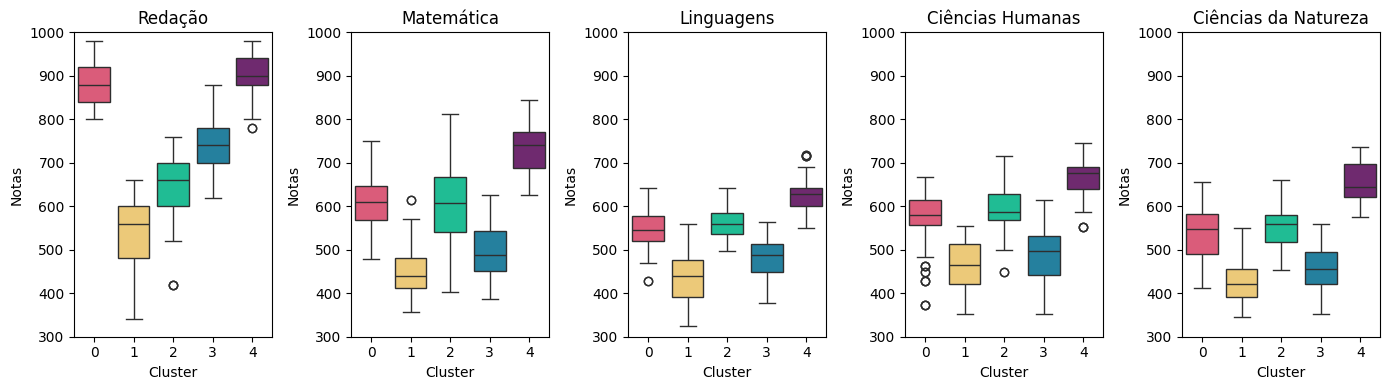

In [137]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

pal = {'0': '#ef476f', '1': '#ffd166', '2': '#06d6a0', '3': '#118ab2', '4': '#7b1e7a'}


fig, axes = plt.subplots(1,5, figsize=(14, 4))  # Grade de 5x2 para os subplots
axes = axes.flatten()  # Transforma os eixos em uma lista para iteração

disciplinas = ['Redação',
                'Matemática',
                'Linguagens',
                'Ciências Humanas',
                'Ciências da Natureza']

for i, disciplina in enumerate(disciplinas):
    sns.boxplot(
        x=df["cluster_kmeans"],
        y=df_num[disciplina],
        ax=axes[i],
        palette=pal
    )
    axes[i].set_title(disciplina)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Notas')
    axes[i].set_ylim(300, 1000)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
# Salvar e exibir
plt.savefig('boxplot_clusters.png')

plt.show()

Os clusters 0 (vermelho) e 2 (verde) têm pelo menos 50% das observações (dentro das caixinhas) com valores similares para todas as disciplinas, com exceção de Redação, na qual o cluster 0 exibiu notas maiores que o 2.

Os clusters 1 (amarelo) e 3 (azul) também exibiram notas similares em todas as disciplinas, com exceção da Redação, em que o cluster 3 exibiu maiores notas do que o cluster 1.

Já o cluster 4 exibiu notas mais altas em todas as disciplinas.

Para ver os valores exatos dos limites exibidos nos boxplots, confira a tabela abaixo.

In [138]:
df_num['cluster_kmeans'] = kmeans_clusters
df_num_group = df_num.groupby('cluster_kmeans')
df_num_group.describe().T

cluster_kmeans                       0           1           2           3  \
Ciências Humanas     count  201.000000  139.000000  118.000000  187.000000   
                     mean   576.085075  460.151799  594.869492  485.385561   
                     std     53.185391   56.067022   49.350874   59.869440   
                     min    372.700000  352.200000  449.400000  352.500000   
                     25%    557.000000  421.400000  568.400000  441.500000   
                     50%    579.900000  463.800000  587.600000  496.700000   
                     75%    613.500000  513.450000  629.200000  530.700000   
                     max    668.200000  553.600000  714.700000  613.600000   
Matemática           count  201.000000  139.000000  118.000000  187.000000   
                     mean   604.235821  451.545324  599.509322  494.950802   
                     std     58.034072   53.273639   80.093705   59.803311   
                     min    479.300000  355.800000  402.100000  386.300000   
                     25%    569.300000  413.100000  540.500000  450.150000   
                     50%    608.900000  439.800000  606.500000  487.500000   
                     75%    645.900000  481.400000  667.025000  543.650000   
                     max    750.300000  613.500000  813.100000  627.000000   
Ciências da Natureza count  201.000000  139.000000  118.000000  187.000000   
                     mean   537.908955  424.900000  553.474576  453.793583   
                     std     57.151466   45.565403   46.324534   49.869385   
                     min    411.900000  344.400000  453.500000  352.700000   
                     25%    491.200000  390.250000  518.675000  421.900000   
                     50%    548.300000  420.500000  558.400000  455.400000   
                     75%    581.100000  455.900000  580.500000  495.000000   
                     max    654.800000  549.100000  661.500000  560.200000   
Linguagens           count  201.000000  139.000000  118.000000  187.000000   
                     mean   554.028358  435.999281  562.687288  479.934225   
                     std     41.724608   53.152347   33.864790   48.385694   
                     min    428.700000  325.100000  497.800000  376.800000   
                     25%    521.200000  390.700000  536.100000  448.000000   
                     50%    545.800000  440.100000  559.600000  488.800000   
                     75%    576.800000  476.950000  583.700000  514.250000   
                     max    641.000000  559.000000  641.500000  563.300000   
Redação              count  201.000000  139.000000  118.000000  187.000000   
                     mean   881.293532  540.863309  644.745763  743.957219   
                     std     50.796835   79.741267   74.909768   64.084607   
                     min    800.000000  340.000000  420.000000  620.000000   
                     25%    840.000000  480.000000  600.000000  700.000000   
                     50%    880.000000  560.000000  660.000000  740.000000   
                     75%    920.000000  600.000000  700.000000  780.000000   
                     max    980.000000  660.000000  760.000000  880.000000   

cluster_kmeans                       4  
Ciências Humanas     count  137.000000  
                     mean   669.478102  
                     std     41.362552  
                     min    551.900000  
                     25%    640.300000  
                     50%    677.400000  
                     75%    690.900000  
                     max    745.500000  
Matemática           count  137.000000  
                     mean   740.209489  
                     std     55.021210  
                     min    626.600000  
                     25%    688.400000  
                     50%    740.600000  
                     75%    770.600000  
                     max    844.800000  
Ciências da Natureza count  137.000000  
                     mean   655.305109  
                     s